# 1_Import

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.war = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

from subprocess import check_output
print(check_output(["ls", "./01_data"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



# 2_Data Loding

In [78]:
train = pd.read_csv('./01_data/train.csv')
test = pd.read_csv('./01_data/test.csv')

In [31]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.000,287.000,292.000,289.500,2.800,2.800,2.700,2.700,...,70.978,70.877,70.705,70.560,70.427,70.340,70.294,70.262,70.170,70.043
1,TRAIN_0001,534,293.000,284.000,336.000,310.000,3.300,3.300,3.300,3.200,...,71.535,71.382,71.254,71.093,70.956,70.797,70.598,70.565,70.561,70.428
2,TRAIN_0002,634,300.000,392.000,450.000,421.000,3.000,2.900,2.900,2.900,...,71.280,71.200,71.144,71.027,70.920,70.877,70.710,70.596,70.418,70.400
3,TRAIN_0003,639,289.000,368.000,379.000,373.500,3.100,3.000,3.000,3.000,...,69.935,69.884,69.846,69.795,69.780,69.615,69.455,69.282,69.239,69.134
4,TRAIN_0004,496,306.000,353.000,358.000,355.500,3.700,3.600,3.600,3.600,...,68.313,68.285,68.210,68.209,68.040,67.860,67.776,67.701,67.504,67.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.000,353.000,367.000,360.000,4.700,4.600,4.500,4.500,...,66.347,66.294,66.193,66.177,66.110,66.009,65.890,65.734,65.587,65.561
2203,TRAIN_2203,611,266.000,337.000,400.000,368.500,3.100,3.000,3.000,3.000,...,73.439,73.432,73.355,73.329,73.271,73.089,73.072,73.069,72.953,72.944
2204,TRAIN_2204,650,237.000,353.000,362.000,357.500,3.000,3.000,2.900,2.900,...,67.576,67.404,67.394,67.247,67.117,66.934,66.735,66.572,66.506,66.479
2205,TRAIN_2205,363,281.000,337.000,403.000,370.000,3.900,3.900,3.800,3.800,...,66.766,66.603,66.511,66.335,66.324,66.249,66.203,66.109,65.935,65.812


In [32]:
test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.000,219.000,302.000,260.500,4.300,4.200,4.200,4.100,4.100,...,72.091,71.906,71.887,71.859,71.726,71.532,71.477,71.321,71.184,71.000
1,TEST_0001,206.000,324.000,346.000,335.000,2.500,2.500,2.500,2.500,2.500,...,68.424,68.353,68.347,68.188,67.995,67.880,67.745,67.674,67.540,67.448
2,TEST_0002,282.000,373.000,404.000,388.500,4.700,4.700,4.600,4.600,4.500,...,74.436,74.247,74.143,74.070,73.892,73.796,73.616,73.440,73.387,73.228
3,TEST_0003,234.000,337.000,357.000,347.000,3.600,3.600,3.600,3.600,3.500,...,73.571,73.420,73.314,73.149,73.110,72.925,72.847,72.838,72.672,72.538
4,TEST_0004,222.000,329.000,347.000,338.000,2.700,2.700,2.700,2.700,2.600,...,72.217,72.163,72.053,71.906,71.766,71.747,71.669,71.501,71.420,71.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.000,265.000,288.000,276.500,2.500,2.500,2.400,2.400,2.400,...,70.568,70.529,70.334,70.245,70.187,70.010,69.917,69.772,69.738,69.601
2204,TEST_2204,182.000,191.000,262.000,226.500,4.100,4.100,4.100,4.000,4.000,...,66.546,66.486,66.408,66.255,66.207,66.080,65.951,65.885,65.720,65.632
2205,TEST_2205,254.000,280.000,332.000,306.000,3.800,3.800,3.800,3.700,3.700,...,63.254,63.134,63.035,62.878,62.681,62.500,62.422,62.417,62.324,62.308
2206,TEST_2206,257.000,285.000,297.000,291.000,4.500,4.400,4.400,4.300,4.300,...,64.332,64.138,64.045,63.944,63.917,63.798,63.763,63.682,63.512,63.344


In [79]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['ID']
test_ID = test['ID']

#Now drop the 'ID' column since it's unnecessary for the prediction process.
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

#check again the data size after dropping the 'ID' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (2207, 184) 
The test data size before dropping Id feature is : (2208, 183) 

The train data size after dropping Id feature is : (2207, 183) 
The test data size after dropping Id feature is : (2208, 182) 


### 2_1 EDA

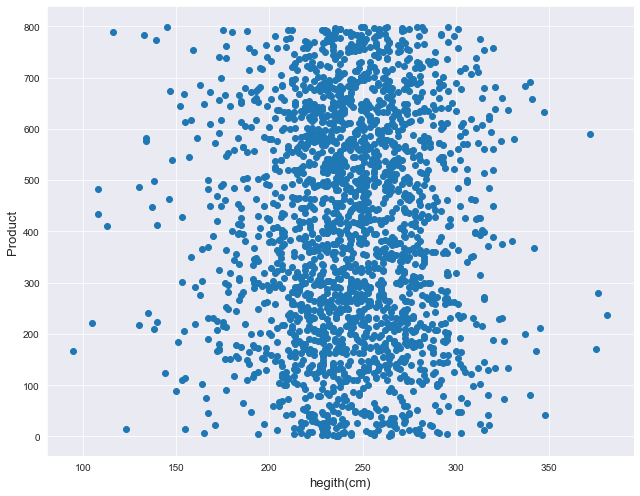

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수고(m)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('hegith(cm)', fontsize=13)
plt.tight_layout()
plt.show()

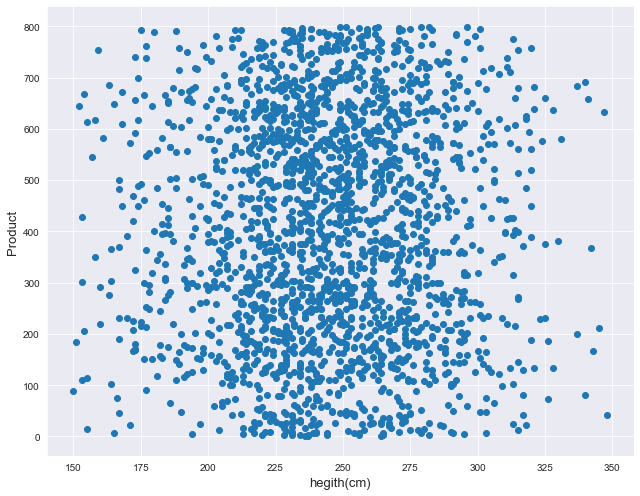

In [81]:
# Deleting outliers
train = train.drop(train[(train['수고(m)']>350)].index)
train = train.drop(train[(train['수고(m)']<150)].index)

# Check the graphic again
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수고(m)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('hegith(cm)', fontsize=13)
plt.tight_layout()
plt.show()

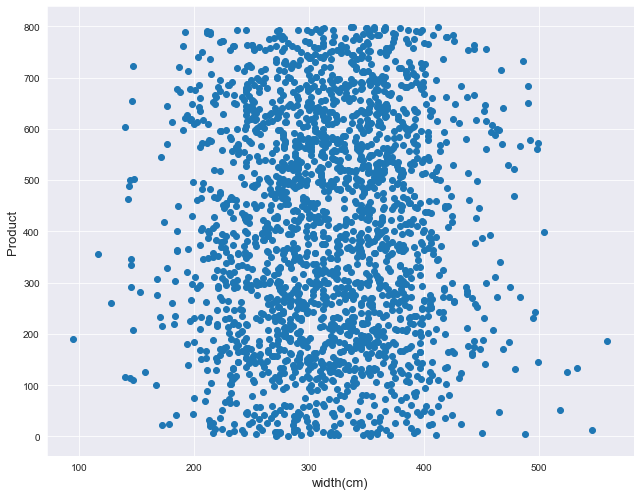

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수관폭1(min)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('width(cm)', fontsize=13)
plt.tight_layout()
plt.show()

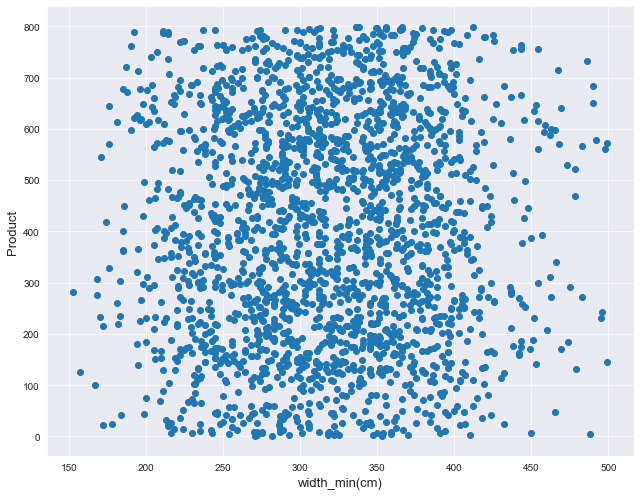

In [83]:
# Deleting outliers
train = train.drop(train[(train['수관폭1(min)']>500)].index)
train = train.drop(train[(train['수관폭1(min)']<150)].index)

# Check the graphic again
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수관폭1(min)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('width_min(cm)', fontsize=13)
plt.tight_layout()
plt.show()

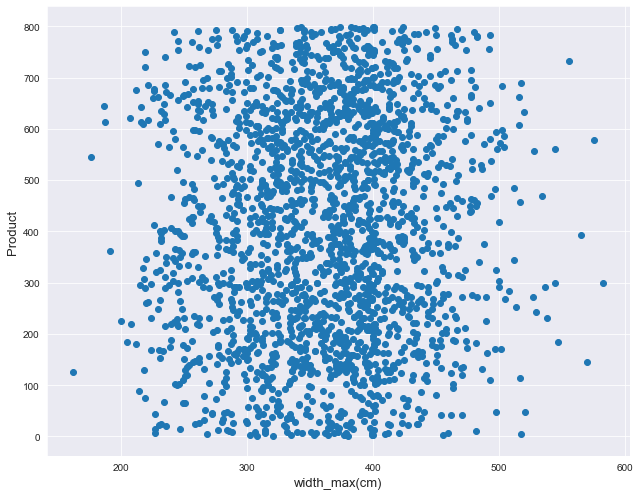

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수관폭2(max)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('width_max(cm)', fontsize=13)
plt.tight_layout()
plt.show()

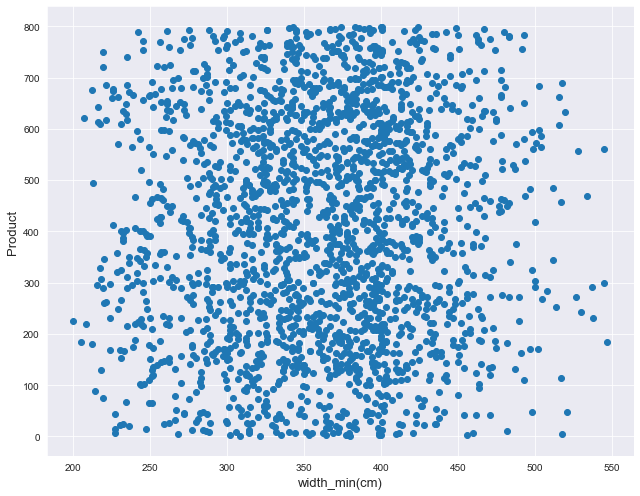

In [85]:
# Deleting outliers
train = train.drop(train[(train['수관폭2(max)']>550)].index)
train = train.drop(train[(train['수관폭2(max)']<200)].index)

# Check the graphic again
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(x = train['수관폭2(max)'], y = train['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('width_min(cm)', fontsize=13)
plt.tight_layout()
plt.show()


 mu = 406.84 and sigma = 218.99



/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/4170896422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['착과량(int)']);
/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/IPython/core/

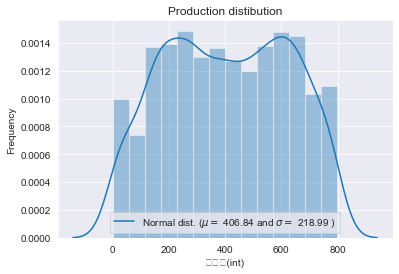

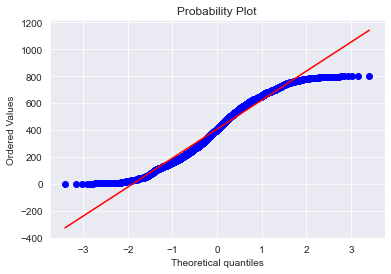


 mu = 406.84 and sigma = 218.99



In [89]:
sns.distplot(train['착과량(int)']);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['착과량(int)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Production distibution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['착과량(int)'], plot=plt)
plt.show()

(mu, sigma) = norm.fit(train['착과량(int)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

### 2_2 Features engineering

In [91]:
ntrain = train.shape[0]
nteast = test.shape[0]

y_train = train['착과량(int)'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['착과량(int)'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (4354, 182)


# 3_입력 Feature와 Target(착과량) 분할

In [97]:
X_train = train.drop(['착과량(int)'], axis=1)
y_train = train['착과량(int)']

# 4_모델 선언 및 학습

In [150]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


import xgboost as xgb
import lightgbm as lgb

In [106]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### 4_1 Base models

In [154]:
# LASSO Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Gradient Bossting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=7, nthread=-1)

# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=40,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.6,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [157]:
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

In [159]:
# Training LGB
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test)
print("LightGBM Training Completed...")

[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 100 rounds
[150]	training's rmse: 123.789	valid_1's rmse: 121.26
[300]	training's rmse: 73.028	valid_1's rmse: 72.5429
[450]	training's rmse: 47.479	valid_1's rmse: 49.8377
[600]	training's rmse: 35.6013	valid_1's rmse: 41.1045
[750]	training's rmse: 30.2317	valid_1's rmse: 38.3125
[900]	training's rmse: 27.3522	valid_1's rmse: 37.6056
[1050]	training's rmse: 25.4157	valid_1's rmse: 37.575
Early stopping, best iteration is:
[996]	training's rmse: 26.058	valid_1's rmse: 37.5403
LightGBM Training Completed...


/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/2722591953.py:26: RuntimeWarning: overflow encountered in expm1
  pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))


In [ ]:

# Adaboost Regressor
model_Ada = AdaBoostRegressor(n_estimators=100, random_state=0)

# Catboost Regressor
model_Cat = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

In [153]:
score = rmsle_cv(model_Cat)
print("\nCatboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0:	learn: 211.2152593	total: 91.9ms	remaining: 45.8s
50:	learn: 36.7047143	total: 1.82s	remaining: 16s
100:	learn: 17.9855252	total: 3.44s	remaining: 13.6s
150:	learn: 11.6449624	total: 5.08s	remaining: 11.7s
200:	learn: 7.9526499	total: 6.63s	remaining: 9.86s
250:	learn: 5.9819241	total: 8.28s	remaining: 8.22s
300:	learn: 4.7594654	total: 9.94s	remaining: 6.57s
350:	learn: 4.0451811	total: 11.5s	remaining: 4.88s
400:	learn: 3.5054170	total: 13.1s	remaining: 3.23s
450:	learn: 3.0926896	total: 14.7s	remaining: 1.6s
499:	learn: 2.7714772	total: 16.3s	remaining: 0us
0:	learn: 209.6392762	total: 32.2ms	remaining: 16.1s
50:	learn: 35.8937875	total: 1.65s	remaining: 14.6s
100:	learn: 17.6383353	total: 3.29s	remaining: 13s
150:	learn: 11.3952891	total: 4.92s	remaining: 11.4s
200:	learn: 7.6607990	total: 6.58s	remaining: 9.78s
250:	learn: 5.6289620	total: 8.3s	remaining: 8.23s
300:	learn: 4.6055285	total: 9.91s	remaining: 6.55s
350:	learn: 3.9655612	total: 11.6s	remaining: 4.92s
400:	learn: 3.

In [115]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0006 (0.0000)



In [120]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0604 (0.0032)



In [121]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0050 (0.0003)



In [122]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 15.8336 (1.2278)



In [124]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[04:09:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:09:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:09:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/a

In [125]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] 

### 4_2 Stacking models

In [132]:
# Averaged base models class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [143]:
averaged_models = AveragingModels(models = (ENet, KRR, lasso, model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] 

In [160]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [161]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/998878700.py", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 984, in __getitem__
    return self._get_with(key)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 1019, in _get_with
    return self.loc[key]
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 967, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1191, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1132, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1327, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5782, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5845, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 42, 43, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 87, 88, 89, 90, 91, 92, 94, 95, 98, 99, 100, 101, 103, 104, 106, 107, 110, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 195, 197, 199, 200, 201, 202, 203, 205, 206, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 234, 236, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 255, 256, 257, 258, 259, 260, 261, 262, 263, 266, 267, 268, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 285, 288, 292, 293, 294, 295, 296, 297, 298, 299, 300, 303, 304, 305, 306, 307, 308, 311, 313, 314, 315, 316, 317, 318, 319, 320, 322, 324, 327, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 346, 347, 349, 350, 351, 352, 353, 354, 355, 358, 359, 360, 361, 362, 363, 365, 366, 368, 369, 370, 371, 373, 374, 377, 378, 379, 381, 383, 385, 386, 387, 388, 390, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 406, 409, 411, 412, 413, 415, 416, 417, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 436, 437, 438, 439, 440, 441, 443, 459, 479, 483, 505, 548, 620, 664, 665, 681, 712, 793, 851, 901, 913, 992, 1033, 1071, 1101, 1105, 1116, 1134, 1249, 1312, 1330, 1347, 1413, 1440, 1456, 1469, 1485, 1506, 1515, 1535, 1573, 1614, 1630] not in index'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/998878700.py", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 984, in __getitem__
    return self._get_with(key)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 1019, in _get_with
    return self.loc[key]
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 967, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1191, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1132, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1327, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5782, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5845, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: '[73, 189, 200, 201, 205, 239, 343, 353, 390, 405, 415, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 458, 459, 460, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 482, 483, 484, 485, 486, 488, 489, 490, 491, 492, 494, 496, 498, 499, 500, 501, 503, 504, 505, 506, 508, 509, 511, 512, 513, 514, 515, 516, 520, 523, 525, 526, 527, 528, 529, 531, 532, 533, 534, 536, 537, 539, 541, 542, 544, 545, 546, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 558, 560, 562, 563, 564, 565, 566, 567, 569, 570, 571, 572, 573, 574, 575, 576, 579, 580, 582, 584, 585, 586, 587, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 617, 618, 620, 621, 622, 623, 624, 625, 626, 627, 631, 633, 634, 636, 637, 639, 640, 642, 647, 648, 650, 651, 652, 653, 654, 655, 656, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 669, 670, 671, 672, 675, 676, 677, 678, 679, 680, 681, 682, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 701, 702, 703, 706, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 721, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 735, 737, 738, 739, 740, 742, 743, 744, 745, 746, 747, 748, 749, 750, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 769, 770, 771, 773, 775, 776, 777, 779, 781, 783, 784, 786, 787, 788, 790, 791, 793, 794, 795, 796, 797, 800, 803, 806, 807, 808, 809, 810, 811, 812, 813, 815, 816, 817, 818, 819, 820, 821, 822, 824, 825, 826, 827, 829, 830, 832, 833, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 860, 863, 865, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 878, 879, 880, 881, 882, 883, 884, 885, 901, 913, 992, 1033, 1071, 1101, 1105, 1116, 1134, 1190, 1249, 1312, 1330, 1347, 1413, 1440, 1456, 1485, 1496, 1506, 1515, 1535, 1573, 1614] not in index'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/998878700.py", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 984, in __getitem__
    return self._get_with(key)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 1019, in _get_with
    return self.loc[key]
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 967, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1191, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1132, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1327, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5782, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5845, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: '[73, 189, 200, 201, 205, 239, 343, 353, 390, 405, 415, 459, 479, 483, 505, 548, 620, 664, 665, 681, 712, 793, 851, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 916, 917, 918, 919, 920, 922, 923, 924, 925, 926, 928, 929, 931, 932, 934, 936, 937, 938, 940, 942, 944, 946, 947, 949, 950, 951, 952, 953, 954, 955, 957, 958, 961, 962, 963, 964, 965, 966, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 987, 989, 992, 993, 994, 995, 996, 997, 999, 1001, 1003, 1005, 1006, 1008, 1011, 1013, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1028, 1029, 1030, 1031, 1033, 1034, 1035, 1037, 1038, 1039, 1040, 1043, 1045, 1046, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1063, 1064, 1065, 1067, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1079, 1082, 1083, 1084, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1122, 1124, 1125, 1127, 1128, 1131, 1132, 1133, 1134, 1135, 1136, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1149, 1150, 1151, 1152, 1154, 1156, 1157, 1158, 1159, 1160, 1162, 1163, 1165, 1166, 1167, 1168, 1169, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1183, 1185, 1186, 1187, 1188, 1189, 1190, 1193, 1194, 1195, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1206, 1208, 1209, 1211, 1214, 1217, 1218, 1219, 1220, 1222, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1262, 1263, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1275, 1276, 1277, 1278, 1281, 1282, 1283, 1284, 1285, 1287, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1311, 1312, 1313, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1330, 1347, 1413, 1440, 1456, 1485, 1496, 1506, 1515, 1535, 1573, 1614] not in index'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/998878700.py", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 984, in __getitem__
    return self._get_with(key)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 1019, in _get_with
    return self.loc[key]
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 967, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1191, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1132, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1327, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5782, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5845, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: '[73, 189, 200, 201, 205, 239, 343, 353, 390, 405, 415, 459, 479, 483, 505, 548, 620, 664, 665, 681, 712, 793, 851, 901, 913, 992, 1033, 1071, 1101, 1105, 1116, 1134, 1190, 1249, 1312, 1327, 1328, 1329, 1330, 1331, 1332, 1335, 1336, 1338, 1340, 1341, 1342, 1343, 1345, 1347, 1348, 1349, 1351, 1352, 1353, 1354, 1355, 1358, 1359, 1360, 1361, 1363, 1364, 1365, 1366, 1367, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1380, 1381, 1382, 1383, 1384, 1386, 1387, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1419, 1421, 1422, 1423, 1424, 1426, 1427, 1428, 1429, 1430, 1432, 1433, 1436, 1437, 1439, 1440, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1460, 1461, 1462, 1463, 1464, 1466, 1467, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1501, 1502, 1504, 1505, 1506, 1507, 1509, 1511, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1541, 1542, 1543, 1544, 1546, 1547, 1548, 1550, 1551, 1552, 1553, 1554, 1556, 1557, 1558, 1559, 1560, 1561, 1563, 1564, 1566, 1567, 1568, 1569, 1570, 1571, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1588, 1589, 1590, 1591, 1592, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1608, 1609, 1611, 1613, 1614, 1615, 1616, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1631, 1632, 1633, 1634, 1636, 1637, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1652, 1653, 1654, 1655, 1657, 1659, 1660, 1661, 1662, 1663, 1664, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1678, 1679, 1680, 1681, 1684, 1686, 1688, 1689, 1690, 1691, 1692, 1693, 1695, 1696, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1708, 1709, 1710, 1711, 1712, 1714, 1716] not in index'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/t5/724frpvx56s6fd7fppd49j0r0000gn/T/ipykernel_60922/998878700.py", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 984, in __getitem__
    return self._get_with(key)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/series.py", line 1019, in _get_with
    return self.loc[key]
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 967, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1191, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1132, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexing.py", line 1327, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5782, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 5845, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: '[73, 189, 200, 201, 205, 239, 343, 353, 390, 405, 415, 459, 479, 483, 505, 548, 620, 664, 665, 681, 712, 793, 851, 901, 913, 992, 1033, 1071, 1101, 1105, 1116, 1134, 1190, 1249, 1312, 1330, 1347, 1413, 1440, 1456, 1485, 1496, 1506, 1515, 1535, 1573, 1614] not in index'


In [144]:
# from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()

averaged_models.fit(X_train, y_train)

/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+06, tolerance: 1.029e+04
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+06, tolerance: 1.029e+04
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


AveragingModels(models=(Pipeline(steps=[('robustscaler', RobustScaler()),
                                        ('elasticnet',
                                         ElasticNet(alpha=0.0005, l1_ratio=0.9,
                                                    random_state=3))]),
                        KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                    kernel='polynomial'),
                        Pipeline(steps=[('robustscaler', RobustScaler()),
                                        ('lasso',
                                         Lasso(alpha=0.0005, random_state=1))]),
                        LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                                      bagging_seed=9, feature_fraction=0.2319,
                                      feature_fraction_seed=9,
                                      learning_rate=0.05, max_bin=55,
                                      min_data_in_leaf=6,
                                      min_sum_hessian_in_leaf=11,
                                      n_estimators=720, num_leaves=5,
                                      objective='regression')))

# 5_추론

In [163]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


ValueError: Number of features of the model must match the input. Model n_features_ is 182 and input n_features is 183 

In [145]:
pred = averaged_models.predict(test)

# 6_제출 (Submission)

In [146]:
sample_submission = pd.read_csv('./01_data/sample_submission.csv')

In [147]:
sample_submission['착과량(int)'] = pred
sample_submission.to_csv('./02_submission/submit.csv', index=False)

In [148]:
sample_submission.head()

,ID,착과량(int)
0,TEST_0000,254.964
1,TEST_0001,751.928
2,TEST_0002,152.211
3,TEST_0003,449.285
4,TEST_0004,697.370
